In [59]:
# Task A

In [60]:
# import required libraries 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [61]:
# Set seed for reproducibility
np.random.seed(42)

In [62]:
# Load data 
data = pd.read_csv("/content/diabetes.csv")

In [63]:
# Take a random sample of 25 observations
sample = data.sample(n=25)

In [64]:
# Calculate mean and highest glucose levels for the sample
sample_mean = sample["Glucose"].mean()
sample_max = sample["Glucose"].max()

# Print mean and highest glucose levels for the sample
print("Sample Mean Glucose Level:", sample_mean)
print("Sample highest Glucose Level:", sample_max)

Sample Mean Glucose Level: 116.64
Sample highest Glucose Level: 183


In [65]:
# Calculate mean and highest glucose levels for the population
population_mean = data["Glucose"].mean()
population_max = data["Glucose"].max()

# Print mean and highest glucose levels for the population
print("Population Mean Glucose Level:", population_mean)
print("Population highest Glucose Level:", population_max)


Population Mean Glucose Level: 120.89453125
Population highest Glucose Level: 199


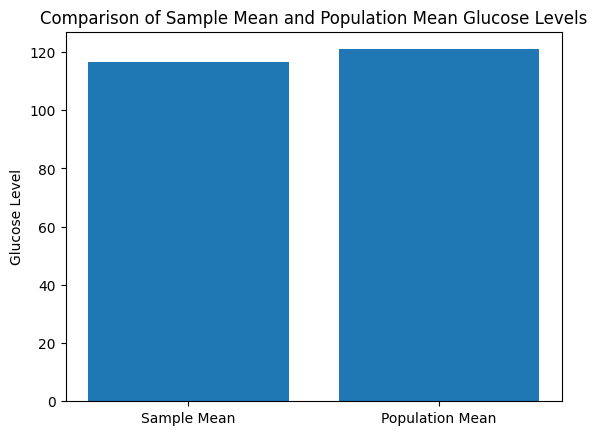

In [66]:
# Bar chart to compare sample mean and population mean
plt.bar(["Sample Mean", "Population Mean"], [sample_mean, population_mean])
plt.title("Comparison of Sample Mean and Population Mean Glucose Levels")
plt.ylabel("Glucose Level")
plt.show()


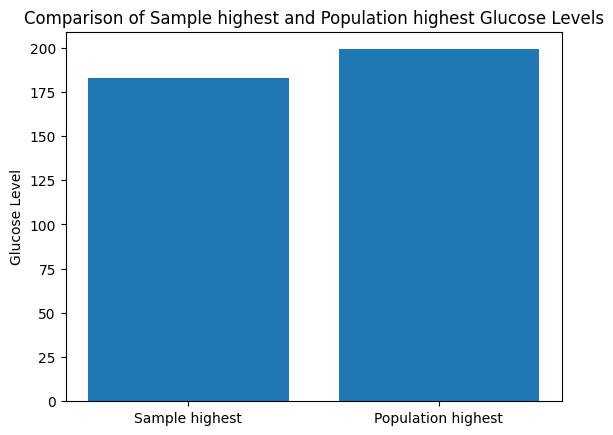

In [67]:
# Create bar chart to compare sample highest and population highest
plt.bar(["Sample highest", "Population highest"], [sample_max, population_max])
plt.title("Comparison of Sample highest and Population highest Glucose Levels")
plt.ylabel("Glucose Level")
plt.show()


In [38]:
# Task B

In [39]:
# Take a random sample of 25 observations
sample = data.sample(25)

# Find the 98th percentile of BMI for the population and the sample
pop_bmi_98 = data["BMI"].quantile(0.98)
sample_bmi_98 = sample["BMI"].quantile(0.98)

print("Population 98th percentile BMI:", pop_bmi_98)
print("Sample 98th percentile BMI:", sample_bmi_98)


Population 98th percentile BMI: 47.52599999999996
Sample 98th percentile BMI: 47.9


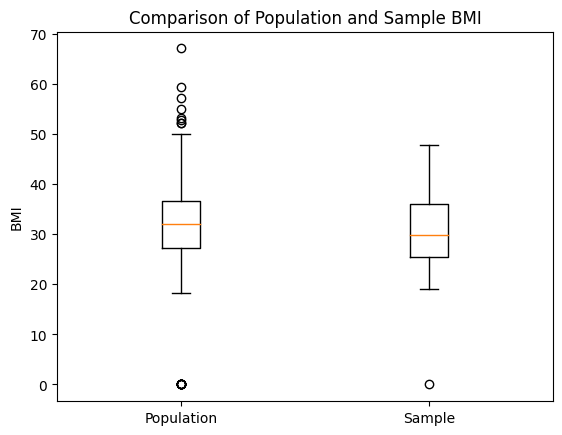

In [40]:
# Create box plot to compare population and sample BMI
plt.boxplot([data["BMI"], sample["BMI"]])
plt.title("Comparison of Population and Sample BMI")
plt.xticks([1, 2], ["Population", "Sample"])
plt.ylabel("BMI")
plt.show()


In [ ]:
# Task C

In [46]:
# Define function to generate bootstrap samples
def bootstrap_samples(data, n_samples=500, sample_size=150):
    samples = []
    for i in range(n_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        samples.append(sample)
    return samples

# Generate bootstrap samples
bp_samples = bootstrap_samples(data["BloodPressure"])

In [47]:
# Calculate mean, standard deviation, and 90th percentile of BloodPressure for each sample
bp_means = [np.mean(sample) for sample in bp_samples]
bp_stds = [np.std(sample, ddof=1) for sample in bp_samples]
bp_90pct = [np.percentile(sample, 90) for sample in bp_samples]



In [48]:
# Print mean, standard deviation, and 90th percentile of BloodPressure for each sample

print("Average mean BloodPressure for bootstrap samples:", np.mean(bp_means))
print("Average standard deviation BloodPressure for bootstrap samples:", np.mean(bp_stds))
print("Average 90th percentile BloodPressure for bootstrap samples:", np.mean(bp_90pct))


Average mean BloodPressure for bootstrap samples: 69.11236
Average standard deviation BloodPressure for bootstrap samples: 19.261815547444982
Average 90th percentile BloodPressure for bootstrap samples: 87.2722


In [49]:
# Calculate mean, standard deviation, and 90th percentile of BloodPressure for population
pop_bp_mean = np.mean(data["BloodPressure"])
pop_bp_std = np.std(data["BloodPressure"], ddof=1)
pop_bp_90pct = np.percentile(data["BloodPressure"], 90)

In [50]:
# Print mean, standard deviation, and 90th percentile of BloodPressure for population
print("Population mean BloodPressure:", pop_bp_mean)
print("Population standard deviation BloodPressure:", pop_bp_std)
print("Population 90th percentile BloodPressure:", pop_bp_90pct)

Population mean BloodPressure: 69.10546875
Population standard deviation BloodPressure: 19.355807170644777
Population 90th percentile BloodPressure: 88.0


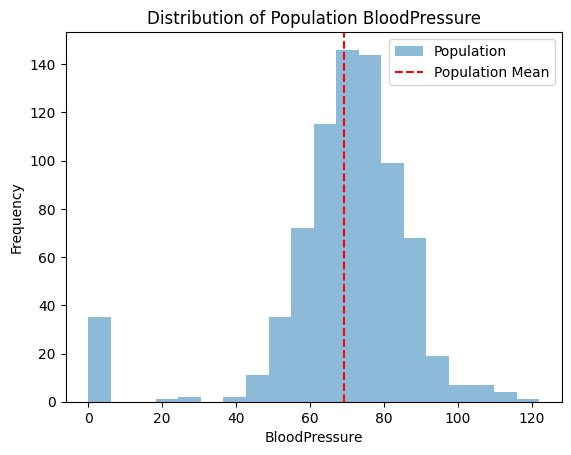

In [51]:
# Create histogram for population BloodPressure
plt.hist(data["BloodPressure"], bins=20, alpha=0.5, label="Population")
plt.axvline(x=pop_bp_mean, color='r', linestyle='--', label="Population Mean")
plt.title("Distribution of Population BloodPressure")
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distribution of Bootstrap Sample Standard Deviations')

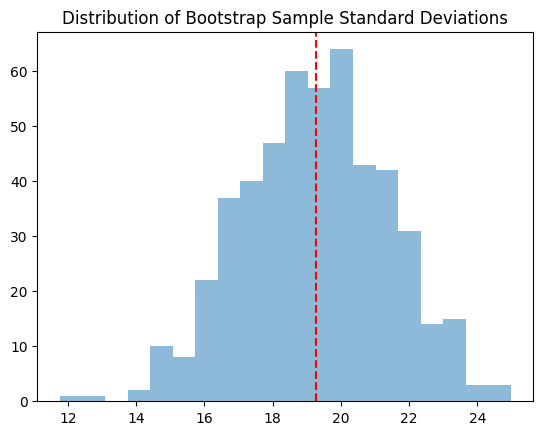

In [52]:
# Create histogram for bootstrap sample standard deviations of BloodPressure
plt.hist(bp_stds, bins=20, alpha=0.5, label="Bootstrap Sample Standard Deviations")
plt.axvline(x=np.mean(bp_stds), color='r', linestyle='--', label="Mean of Sample Standard Deviations")
plt.title("Distribution of Bootstrap Sample Standard Deviations")

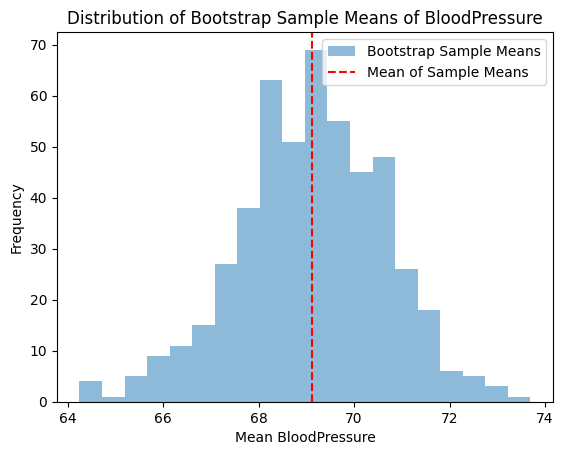

In [53]:
# Create histogram for bootstrap sample means of BloodPressure
plt.hist(bp_means, bins=20, alpha=0.5, label="Bootstrap Sample Means")
plt.axvline(x=np.mean(bp_means), color='r', linestyle='--', label="Mean of Sample Means")
plt.title("Distribution of Bootstrap Sample Means of BloodPressure")
plt.xlabel("Mean BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()
